### **(a) Bayesian Neural Network with limited features (4) and emotions (3):**


In [ ]:
# !pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
!pip3 install torchbnn

In [ ]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import nltk
import os
import nltk.corpus
import datetime 
import scipy.stats as sp
import tensorflow as tf
from sklearn import datasets
import torch
import torch.nn as nn
import torchbnn as bnn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# dataset = datasets.load_iris()
# dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Research/Bayesian deep neural network/imotion_feature_sorted.csv')

In [ ]:
data.dropna()

,SourceStimuliName,SourceStimuliNameArray,Brow Furrow,Cheek Raise,Inner Brow Raise,Lip Suck,Pitch
0,Happy,2,0.751990,9.020000e-06,0.384837,12.007908,-12.256138
1,Happy,2,0.387637,1.420000e-05,0.435094,7.580544,-13.081846
2,Happy,2,0.299397,3.570000e-05,0.376767,6.392175,-13.834060
3,Happy,2,0.307248,5.620000e-05,0.333129,7.258187,-13.380401
4,Happy,2,0.322942,6.690000e-05,0.356248,8.364370,-12.625573
...,...,...,...,...,...,...,...
453,Fearful,1,42.765652,4.000000e-07,1.677433,7.695110,-12.521623
454,Fearful,1,38.136963,3.120000e-07,2.045548,6.303257,-11.275982
455,Fearful,1,31.333426,2.670000e-07,2.429621,5.193444,-12.052565
456,Fearful,1,24.833490,2.450000e-07,2.698661,4.568106,-11.616785


In [ ]:
data.head()

,SourceStimuliName,SourceStimuliNameArray,Brow Furrow,Cheek Raise,Inner Brow Raise,Lip Suck,Pitch
0,Happy,2,0.751990,0.000009,0.384837,12.007908,-12.256138
1,Happy,2,0.387637,0.000014,0.435094,7.580544,-13.081846
2,Happy,2,0.299397,0.000036,0.376767,6.392175,-13.834060
3,Happy,2,0.307248,0.000056,0.333129,7.258187,-13.380401
4,Happy,2,0.322942,0.000067,0.356248,8.364370,-12.625573


In [ ]:
np_array = data.to_numpy()

display(np_array)

array([['Happy', 2, 0.7519899609999999, ..., 0.38483691200000003,
        12.00790787, -12.25613785],
       ['Happy', 2, 0.38763651299999996, ..., 0.435094208, 7.580543518,
        -13.08184624],
       ['Happy', 2, 0.299396873, ..., 0.376766503, 6.3921751979999994,
        -13.83405972],
       ...,
       ['Fearful', 1, 31.33342552, ..., 2.429620504, 5.193443775,
        -12.05256462],
       ['Fearful', 1, 24.83349037, ..., 2.698661089, 4.568105698,
        -11.61678505],
       ['Fearful', 1, 16.41807175, ..., 2.9889028069999997, 4.21561718,
        -10.45123577]], dtype=object)

In [ ]:
x = data[['Brow Furrow','Cheek Raise','Inner Brow Raise','Lip Suck']].to_numpy()
x

array([[7.51989961e-01, 9.02000000e-06, 3.84836912e-01, 1.20079079e+01],
       [3.87636513e-01, 1.42000000e-05, 4.35094208e-01, 7.58054352e+00],
       [2.99396873e-01, 3.57000000e-05, 3.76766503e-01, 6.39217520e+00],
       ...,
       [3.13334255e+01, 2.67000000e-07, 2.42962050e+00, 5.19344378e+00],
       [2.48334904e+01, 2.45000000e-07, 2.69866109e+00, 4.56810570e+00],
       [1.64180717e+01, 2.19000000e-07, 2.98890281e+00, 4.21561718e+00]])

In [ ]:
y = data[['SourceStimuliNameArray']].to_numpy()
y = y.ravel()
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
data = x
target = y
data_tensor=torch.from_numpy(data).float()
target_tensor=torch.from_numpy(target).long()

In [ ]:
x, y = torch.from_numpy(x).float(), torch.from_numpy(y).long()
x.shape, y.shape

(torch.Size([458, 4]), torch.Size([458]))

1. Define model

In [ ]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=3),
)

In [ ]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

###2. Train Model

In [ ]:
kl_weight = 0.1

In [ ]:
for step in range(5000):
    pre = model(x)
    ce = ce_loss(pre, y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

- Accuracy: 94.104803 %
- CE : 0.20, KL : 1.55


### 3. Test Model

In [ ]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(x[:, 0], x[:, 1], c = y)
    z2_plot = ax2.scatter(x[:, 0], x[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

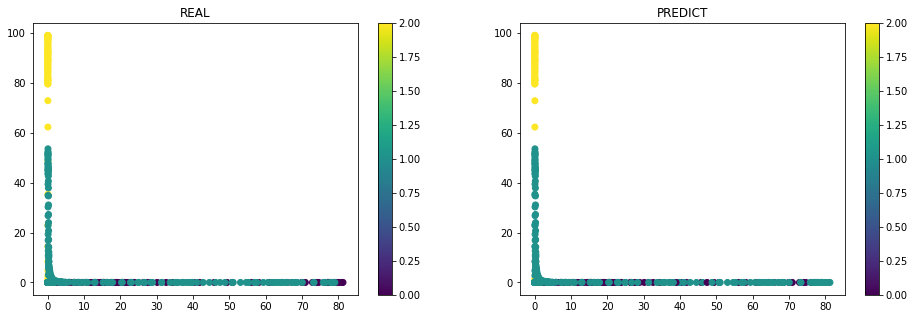

In [ ]:
# Bayesian Neural Network will return different outputs even if inputs are same.
# In other words, different plots will be shown every time forward method is called.
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

### **(b) Different approach: Bayesian Neural Network with all the features (21) and emotions (6):**

In [ ]:
pip install tensorflow-probability

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_probability as tfp

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Research/Bayesian deep neural network/imotion_feature_sorted.csv')
# data1 = pd.read_csv('/content/drive/MyDrive/Research/Bayesian deep neural network/iMotions_sensor_data-sample.csv')
data1 = pd.read_csv('/content/drive/MyDrive/Research/Bayesian deep neural network/Copy of iMotions_sensor_data-sample_n.csv')

In [ ]:
data1 = data1.dropna()
data1.head()

,SourceStimuliName,SourceStimuliArray,Brow Furrow,Brow Raise,Cheek Raise,Chin Raise,Dimpler,Eye Closure,Eye Widen,Inner Brow Raise,Jaw Drop,Lip Corner Depressor,Lip Press,Lip Pucker,Lip Stretch,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise
2,Happy,5,0.751990,5.520000e-08,0.000009,0.072248,0.318606,0.000174,4.360000e-06,0.384837,0.090608,0.000525,0.343026,0.014581,0.019550,12.007908,0.954219,0.005125,0.000005,0.002704,2.967763,9.050000e-09
3,Happy,5,0.387637,1.500000e-07,0.000014,0.058706,0.284007,0.000055,1.280000e-06,0.435094,0.148892,0.000514,0.276015,0.020938,0.018882,7.580544,0.656802,0.004577,0.000004,0.004607,3.029588,7.980000e-09
4,Happy,5,0.299397,1.730000e-07,0.000036,0.037781,0.226752,0.000037,8.980000e-07,0.376767,0.109311,0.000567,0.209866,0.014651,0.016641,6.392175,0.524524,0.004604,0.000005,0.011593,2.656371,9.860000e-09
5,Happy,5,0.307248,2.610000e-07,0.000056,0.041915,0.215460,0.000012,8.440000e-07,0.333129,0.132614,0.000682,0.241785,0.013182,0.016230,7.258187,0.528784,0.004736,0.000008,0.015096,2.009076,1.740000e-08
6,Happy,5,0.322942,5.520000e-07,0.000067,0.038969,0.232620,0.000013,7.800000e-07,0.356248,0.123233,0.000699,0.231732,0.011560,0.015067,8.364370,0.513309,0.006892,0.000012,0.016449,2.183947,2.870000e-08


In [ ]:
np_array = data1.to_numpy()

display(np_array)

array([['Happy', 5, 0.7519899609999999, ..., 0.002703762,
        2.9677634239999997, 9.05e-09],
       ['Happy', 5, 0.38763651299999996, ..., 0.0046073979999999995,
        3.0295877460000002, 7.98e-09],
       ['Happy', 5, 0.299396873, ..., 0.01159304, 2.656371117, 9.86e-09],
       ...,
       ['Disgusted', 1, 27.47338486, ..., 1.035109043, 0.306019545,
        46.09599304],
       ['Disgusted', 1, 32.6378479, ..., 1.1473993059999998, 0.244729802,
        61.01758575],
       ['Disgusted', 1, 37.43032074, ..., 1.27349925, 0.192973912,
        73.467659]], dtype=object)

In [ ]:
x = data1[['Brow Furrow', 'Brow Raise', 'Cheek Raise','Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Jaw Drop', 'Inner Brow Raise','Lip Suck', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lid Tighten', 'Lip Suck',
           'Mouth Open', 'Nose Wrinkle', 'Smile', 'Smile', 'Upper Lip Raise']].to_numpy()
x

array([[7.51989961e-01, 5.52000000e-08, 9.02000000e-06, ...,
        2.70376200e-03, 2.70376200e-03, 9.05000000e-09],
       [3.87636513e-01, 1.50000000e-07, 1.42000000e-05, ...,
        4.60739800e-03, 4.60739800e-03, 7.98000000e-09],
       [2.99396873e-01, 1.73000000e-07, 3.57000000e-05, ...,
        1.15930400e-02, 1.15930400e-02, 9.86000000e-09],
       ...,
       [2.74733849e+01, 1.46000000e-06, 1.05706400e-02, ...,
        1.03510904e+00, 1.03510904e+00, 4.60959930e+01],
       [3.26378479e+01, 1.48000000e-06, 1.27350990e-02, ...,
        1.14739931e+00, 1.14739931e+00, 6.10175858e+01],
       [3.74303207e+01, 1.43000000e-06, 1.52764120e-02, ...,
        1.27349925e+00, 1.27349925e+00, 7.34676590e+01]])

In [ ]:
y = data1[['SourceStimuliArray']].to_numpy()
y = y.ravel()
y

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
data = x
target = y
data_tensor=torch.from_numpy(data).float()
target_tensor=torch.from_numpy(target).long()

In [ ]:
x, y = torch.from_numpy(x).float(), torch.from_numpy(y).long()
x.shape, y.shape

(torch.Size([871, 21]), torch.Size([871]))

In [ ]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=21, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=6),
)



In [ ]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
kl_weight = 0.9

In [ ]:
for step in range(5000):
    pre = model(x)
    ce = ce_loss(pre, y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

- Accuracy: 93.915040 %
- CE : 0.25, KL : 0.55


In [ ]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (18, 7))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(x[:, 0], x[:, 1], c = y)
    z2_plot = ax2.scatter(x[:, 0], x[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

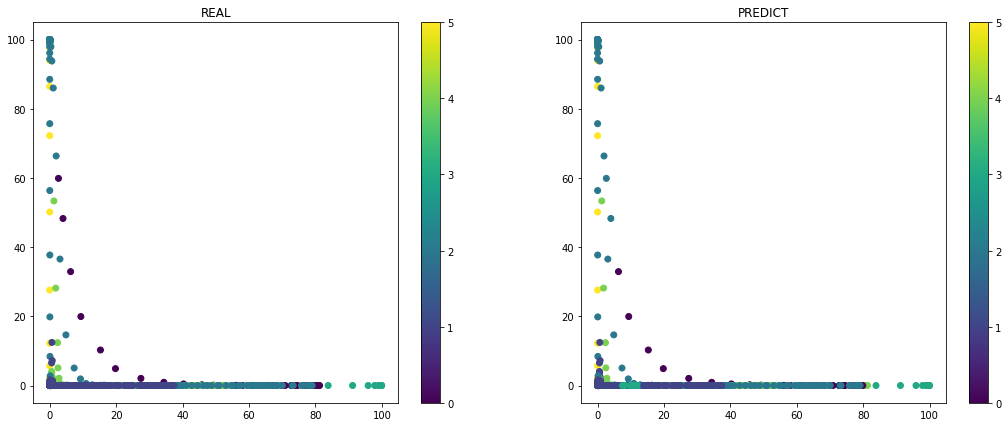

In [ ]:
# Bayesian Neural Network will return different outputs even if inputs are same.
# In other words, different plots will be shown every time forward method is called.
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

### **(c) Artificial Neural Network (ANN) with all the features and emotions:**

In [ ]:
# data2['SourceStimuliArray'].sum() / data1.shape[0] # class rate

2.6004592422502872

In [ ]:
# Importing Packages
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets

In [ ]:
# # Loading Dataset
# data = datasets.load_iris()
# print(data)

In [ ]:
data2 = data1[['SourceStimuliArray', 'Brow Furrow', 'Brow Raise', 'Cheek Raise','Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Jaw Drop', 'Inner Brow Raise','Lip Suck', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lid Tighten', 'Lip Suck',
           'Mouth Open', 'Nose Wrinkle', 'Smile', 'Smile', 'Upper Lip Raise' ]]

In [ ]:
x = data1[['Brow Furrow', 'Brow Raise', 'Cheek Raise','Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Jaw Drop', 'Inner Brow Raise','Lip Suck', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lid Tighten', 'Lip Suck',
           'Mouth Open', 'Nose Wrinkle', 'Smile', 'Smile', 'Upper Lip Raise']].to_numpy()
x

array([[7.51989961e-01, 5.52000000e-08, 9.02000000e-06, ...,
        2.70376200e-03, 2.70376200e-03, 9.05000000e-09],
       [3.87636513e-01, 1.50000000e-07, 1.42000000e-05, ...,
        4.60739800e-03, 4.60739800e-03, 7.98000000e-09],
       [2.99396873e-01, 1.73000000e-07, 3.57000000e-05, ...,
        1.15930400e-02, 1.15930400e-02, 9.86000000e-09],
       ...,
       [2.74733849e+01, 1.46000000e-06, 1.05706400e-02, ...,
        1.03510904e+00, 1.03510904e+00, 4.60959930e+01],
       [3.26378479e+01, 1.48000000e-06, 1.27350990e-02, ...,
        1.14739931e+00, 1.14739931e+00, 6.10175858e+01],
       [3.74303207e+01, 1.43000000e-06, 1.52764120e-02, ...,
        1.27349925e+00, 1.27349925e+00, 7.34676590e+01]])

In [ ]:
y = data1[['SourceStimuliArray']].to_numpy()
y = y.ravel()
y

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Split Dataset
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# Data Shape
print(x_train.shape)
print(x_test.shape)

(609, 21)
(262, 21)


In [ ]:
# Building the Model
model= Sequential()
model.add(Dense(100,input_shape=(21,), activation="tanh"))
model.add(Dense(21, activation='softmax'))

In [ ]:
# Compile the Model
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Fit the Model
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 2.7251 - accuracy: 0.2365
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8083 - accuracy: 0.5353
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 1.4362 - accuracy: 0.6141
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2288 - accuracy: 0.6667
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0976 - accuracy: 0.6880
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.9977 - accuracy: 0.7307
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9731 - accuracy: 0.7044
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.7915
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.8030
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7866 - accuracy: 0.8276
Epoch 11/

In [ ]:
# Evaluate the Model
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8855


[0.35049253702163696, 0.885496199131012]

In [ ]:
# Predict for the first 10 Observations
pred=model.predict(x_test[:10])
print(pred)

In [ ]:
p=np.argmax(pred, axis=1)
print(p)
print(y_test[:10])

[1 5 4 2 3 3 3 1 2 4]
[1 2 4 2 3 2 3 1 2 4]
